#Anvesha Raikwar
##21070126017
###AIML A1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread("/content/best photo -2.jpg", 0)

In [3]:
print(img.shape)

(1024, 768)


Gaussian Noise

In [6]:
# Create a grayscale image with the same dimensions as img
gaussian_noise = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Generate Gaussian noise
cv2.randn(gaussian_noise, 128, 20)

# Scale and convert to uint8
gaussian_noise = (gaussian_noise * 0.5).astype(np.uint8)

# Resize gaussian_noise to match the dimensions of img
gaussian_noise = cv2.resize(gaussian_noise, (img.shape[1], img.shape[0]))

# Add the noise to the image
gaussian_image = cv2.add(img, gaussian_noise)


Text(0.5, 1.0, 'Noisy Image')

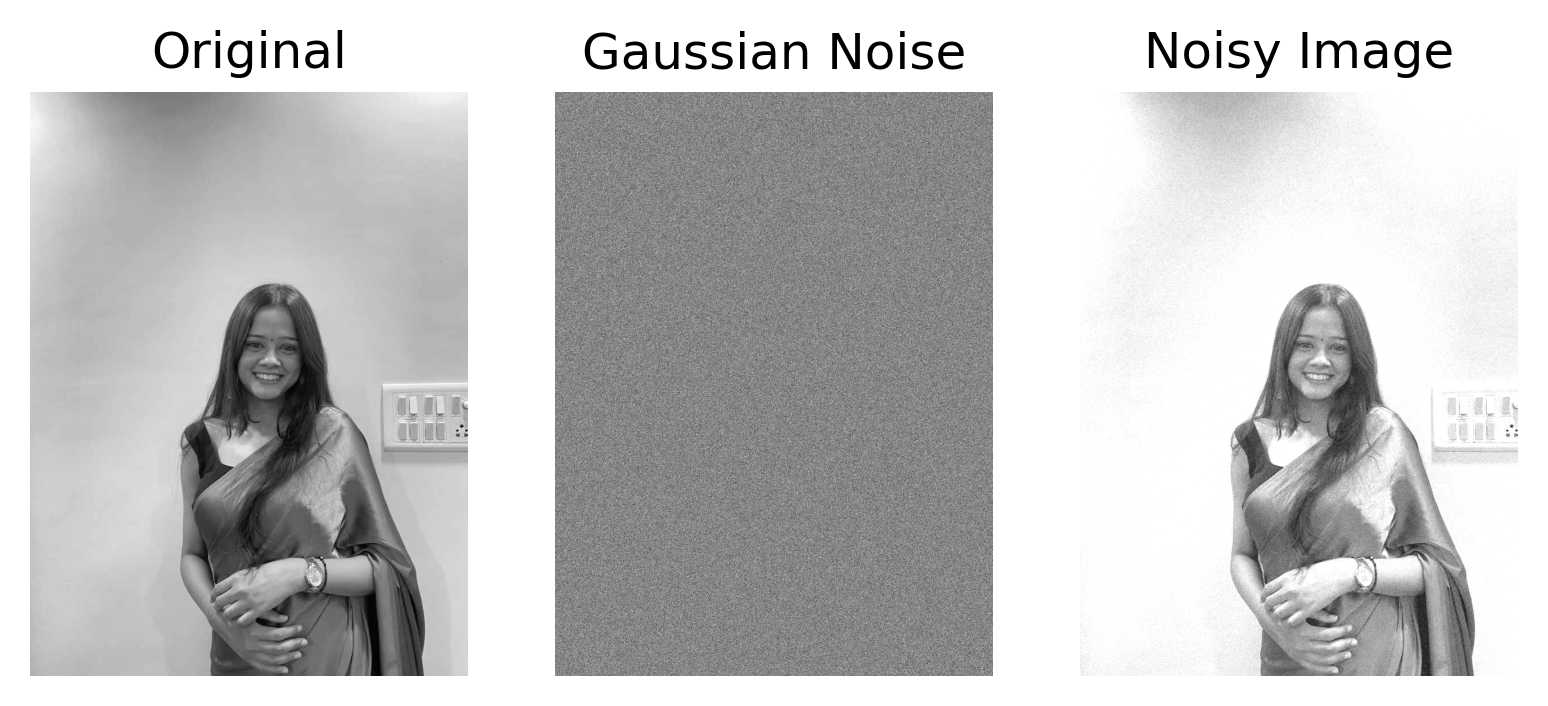

In [7]:
fig = plt.figure(dpi = 300)

fig.add_subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gaussian_noise, cmap="gray")
plt.axis('off')
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gaussian_image, cmap="gray")
plt.axis('off')
plt.title("Noisy Image")

Rayleigh Noise

In [8]:
img = img.astype(np.float64)
noise_std = 0.2
noise_rayleigh = np.random.rayleigh(noise_std, img.shape)
rayleigh_image = cv2.addWeighted(img, 1, noise_rayleigh, 70, 0.0).astype(np.uint8)

Text(0.5, 1.0, 'Noisy Image')

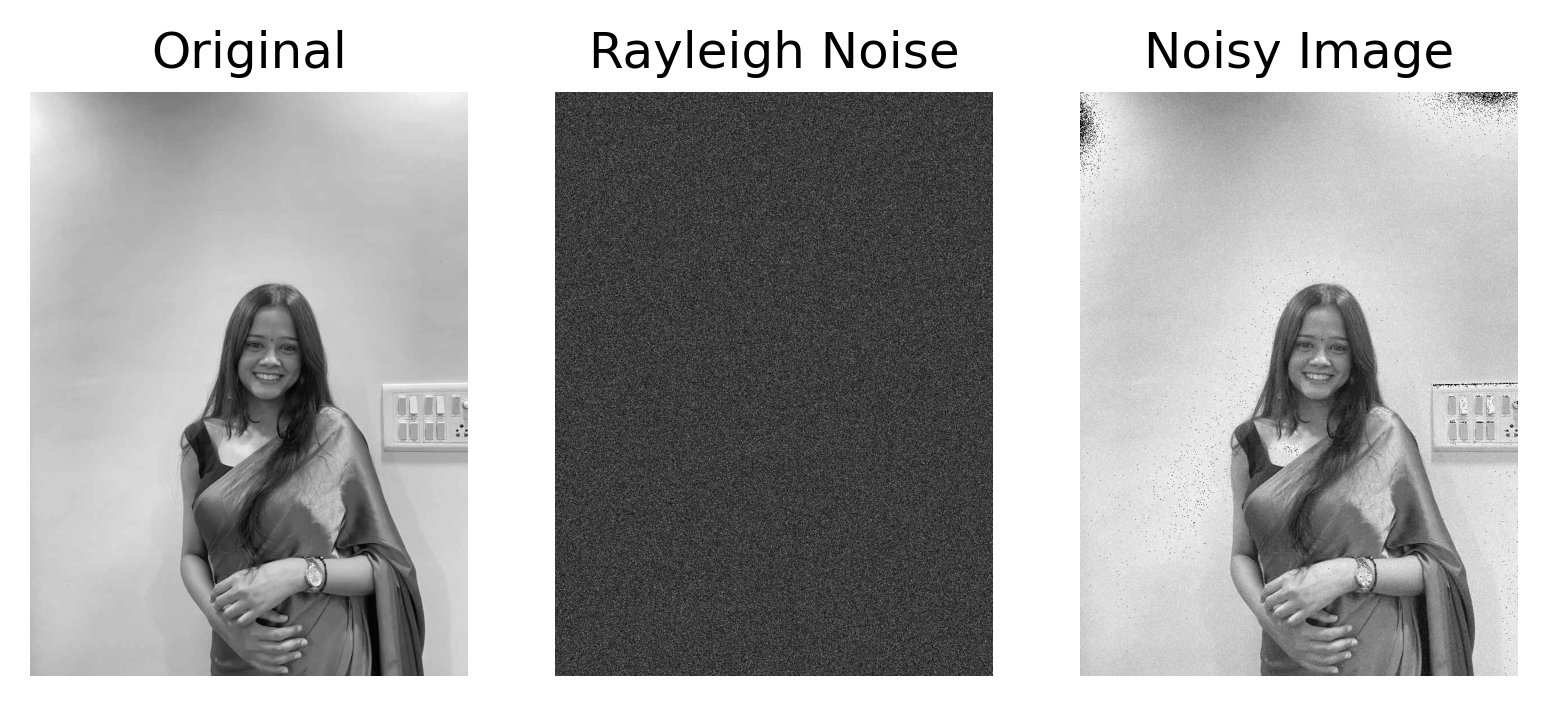

In [9]:
fig = plt.figure(dpi = 300)

fig.add_subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(noise_rayleigh, cmap="gray")
plt.axis('off')
plt.title("Rayleigh Noise")

fig.add_subplot(1,3,3)
plt.imshow(rayleigh_image, cmap="gray")
plt.axis('off')
plt.title("Noisy Image")

Salt and pepper noise

In [10]:
# Generate impulse noise
imp_noise = np.zeros((450,800), dtype=np.uint8)
cv2.randu(imp_noise, 0, 255)
imp_noise = cv2.threshold(imp_noise, 245, 255, cv2.THRESH_BINARY)[1]
imp_noise = cv2.resize(imp_noise, (img.shape[1], img.shape[0]))  # Resize imp_noise to match img's shape

# Add impulse noise to the image
snp_img = cv2.add(img.astype(np.float32), imp_noise.astype(np.float32)).astype(np.uint8)


Text(0.5, 1.0, 'Noisy Image')

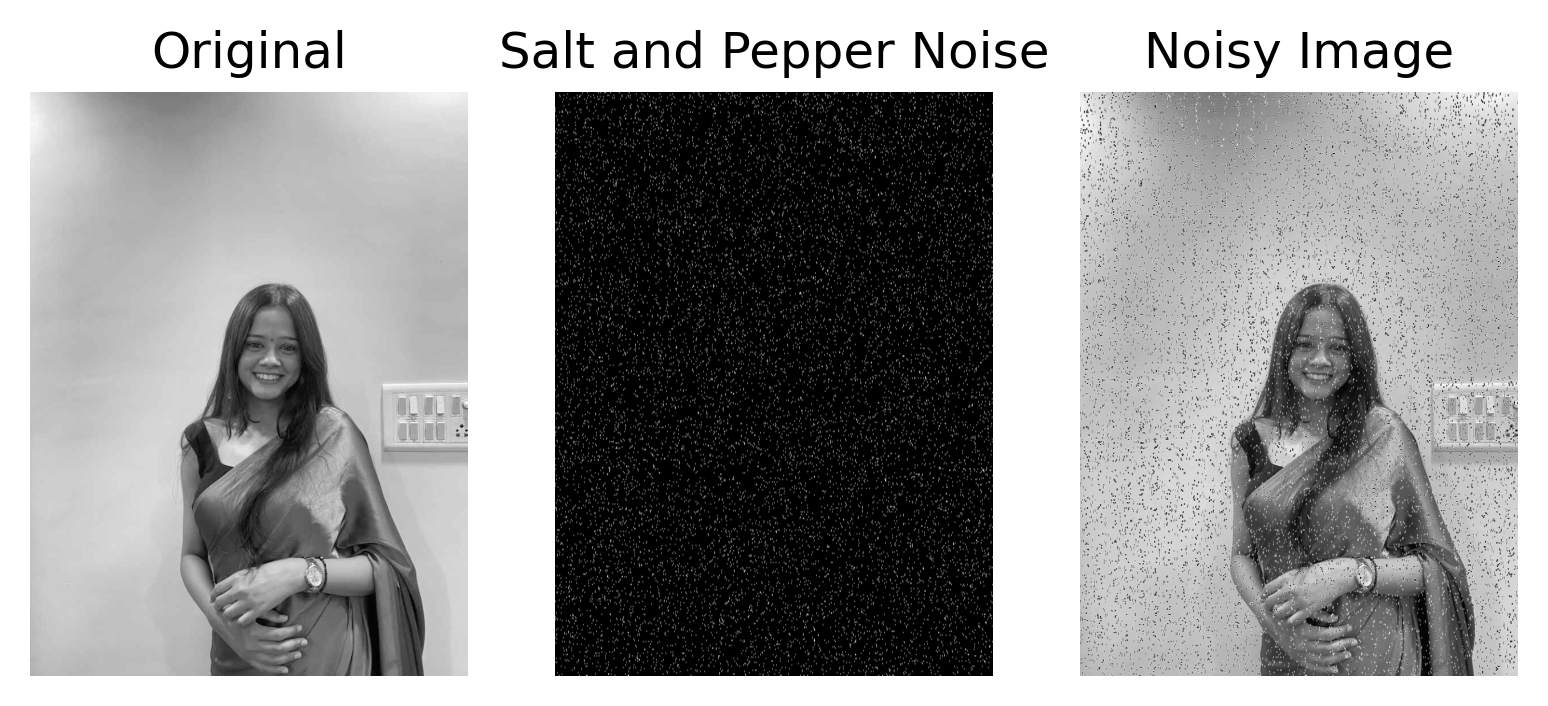

In [11]:
fig = plt.figure(dpi = 300)

fig.add_subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imp_noise, cmap="gray")
plt.axis('off')
plt.title("Salt and Pepper Noise")

fig.add_subplot(1,3,3)
plt.imshow(snp_img, cmap="gray")
plt.axis('off')
plt.title("Noisy Image")

Filters

In [12]:
def filters(image):
    # Median filtering
    median = cv2.medianBlur(image, 5)
    compare_median = np.concatenate((image, median), axis=1)

    # Mean (average) filtering
    mean = cv2.blur(image, (5, 5))
    compare_mean = np.concatenate((image, mean), axis=1)

    # Harmonic filtering
    harmonic_kernel = np.reciprocal(cv2.blur(np.reciprocal(image.astype(np.float32)), (5, 5)))
    harmonic = cv2.filter2D(image, -1, harmonic_kernel)
    compare_harmonic = np.concatenate((image, harmonic), axis=1)

    # Geometric mean filtering
    geometric_kernel = np.exp(cv2.blur(np.log(image.astype(np.float32)), (5, 5)))
    geometric = cv2.filter2D(image, -1, geometric_kernel)
    compare_geometric = np.concatenate((image, geometric), axis=1)

    return compare_median, compare_mean, compare_geometric, compare_harmonic

In the above code, we wrote a function for the filters that are to be used.

**Median Filter**: In the median filter, the value of each pixel is replaced by the median value calculated in a local neighborhood.

**Mean Filter**: The mean filter replaces the value of each pixel by the average of all pixel values in a local neighborhood.

**Harmonic Mean Filter**: In the harmonic mean method, the color value of each pixel is replaced with the harmonic mean of color values of the pixels in a surrounding region.

**Geometric Mean Filter**: In the geometric mean method, the color value of each pixel is replaced with the geometric mean of color values of the pixels in a surrounding region.

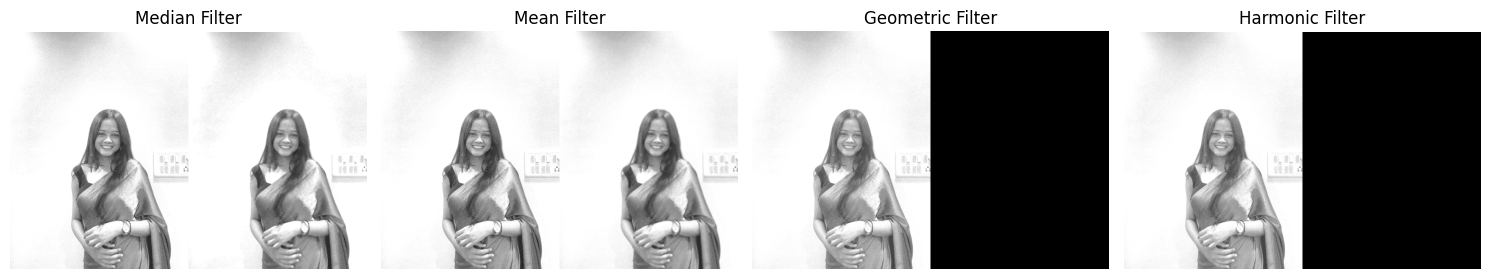

In [13]:
#on guassian noise image
median, mean, geometric, harmonic = filters(gaussian_image)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot images
titles = ['Median Filter', 'Mean Filter', 'Geometric Filter', 'Harmonic Filter']
images = [median, mean, harmonic, geometric]

for ax, title, img in zip(axes, titles, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-12-26610cbca27b>:11: RuntimeWarning: divide by zero encountered in reciprocal
  harmonic_kernel = np.reciprocal(cv2.blur(np.reciprocal(image.astype(np.float32)), (5, 5)))
<ipython-input-12-26610cbca27b>:16: RuntimeWarning: divide by zero encountered in log
  geometric_kernel = np.exp(cv2.blur(np.log(image.astype(np.float32)), (5, 5)))


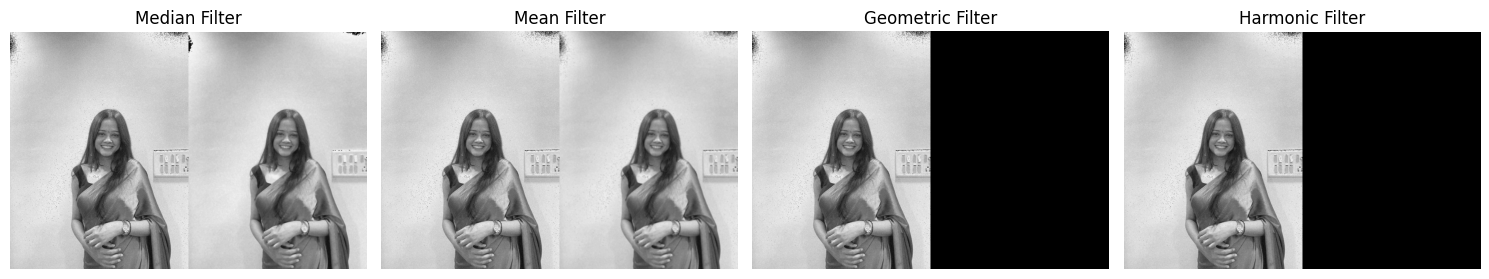

In [14]:
#on rayleigh noise image
median, mean, geometric, harmonic = filters(rayleigh_image)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot images
titles = ['Median Filter', 'Mean Filter', 'Geometric Filter', 'Harmonic Filter']
images = [median, mean, harmonic, geometric]

for ax, title, img in zip(axes, titles, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-12-26610cbca27b>:11: RuntimeWarning: divide by zero encountered in reciprocal
  harmonic_kernel = np.reciprocal(cv2.blur(np.reciprocal(image.astype(np.float32)), (5, 5)))
<ipython-input-12-26610cbca27b>:16: RuntimeWarning: divide by zero encountered in log
  geometric_kernel = np.exp(cv2.blur(np.log(image.astype(np.float32)), (5, 5)))


Text(0.5, 1.0, 'Harmonic Mean Filter')

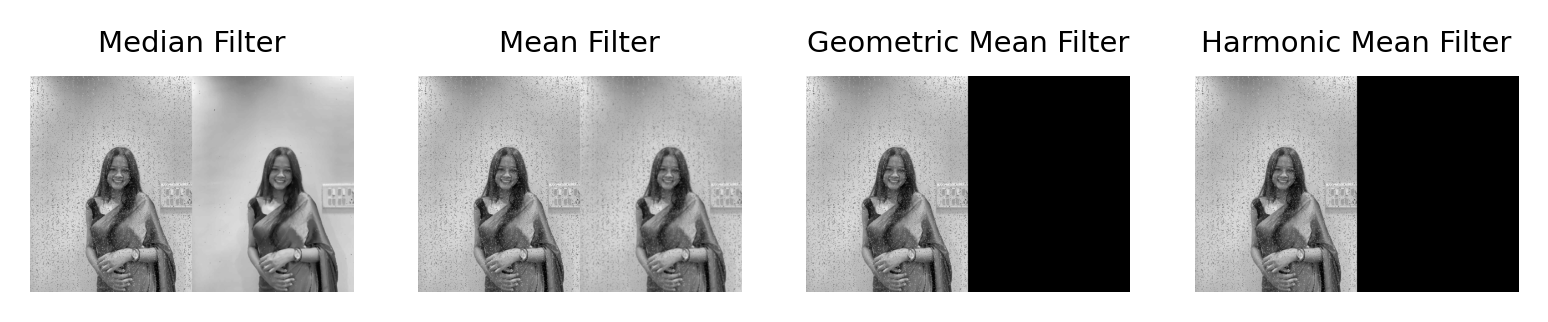

In [15]:
#on salt and pepper noise image
median, mean, geometric, harmonic = filters(snp_img)

fig = plt.figure(dpi = 300)

fig.add_subplot(1,4,1)
plt.imshow(median, cmap="gray")
plt.axis('off')
plt.title("Median Filter", fontsize=7)

fig.add_subplot(1,4,2)
plt.imshow(mean, cmap="gray")
plt.axis('off')
plt.title("Mean Filter", fontsize=7)

fig.add_subplot(1,4,3)
plt.imshow(geometric, cmap="gray")
plt.axis('off')
plt.title("Geometric Mean Filter", fontsize=7)

fig.add_subplot(1,4,4)
plt.imshow(harmonic, cmap="gray")
plt.axis('off')
plt.title("Harmonic Mean Filter",fontsize=7)

To the original image, we added three types of noise: Rayleigh noise, impulse noise, or "salt and pepper" noise, and Gaussian noise. Following that, we applied filters to each noisy image, and we discovered that the mean filter smoothes and lowers noise in the image. The outer edges of an image are preserved using the median filter. An entirely black image was produced using the geometric mean filter and the harmonic mean filter. This happened because the filter coefficients that included more pixels with darker intensity values were produced by the kernels that were primarily designed to capture black pixels. The outcome was an image that was uniformly black.